# Librerías —ฅ/ᐠ. ̫ .ᐟ\ฅ —
---

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

# Punto 4 /ᐠ - ˕ -マ Ⳋ
---


Se tienen dos casos:

Caso 1: $q=1$.

$$
\begin{align*}
    &\frac{du}{dt}=u^q\implies\int\frac{du}{u}=\int{dt}\implies ln(u)=t\implies u=e^t.\\
    &\therefore\,u(t) = e^{t}.
\end{align*}
$$

Caso 2: $q<1$.

Nótese que para $q<1$  la ecuación diferencial se convierte en una ecuación de Bernoulli. Tomemos, entonces, $z = u^{1-q}$. Luego,
$$
\begin{align*}
    &u=z^{\frac{1}{1-q}}\implies\frac{du}{dt}\frac{1}{1-q}z^{\frac{1}{1-q}-1}\frac{dz}{dt}.\\
    &\text{Luego, como } zu^{-1}=u^{-q}\implies \frac{z}{z^{\frac{1}{1-q}}}=(1-q)z^{\frac{1}{1-q}-1}\frac{dt}{dz}.\\
    &\implies z\frac{dz}{dt}=(1-q)z\implies \frac{dz}{dt}=1-q\implies z=t(1-q)+c\implies u={(t(1-q)+c)}^{\frac{1}{1-q}}.\\
\end{align*}
$$
Finalmente, evaluando $u(0) = 1$, es fácil ver que  $c=1$.

$\therefore\,u(t)=((1-q)t +1)^{\frac{1}{1-q}}$ cuando $q<1$.

Adicionalmente, dado que $0<q<1\,\wedge\,t\in[0,10]\rightarrow 0<1-q\rightarrow 0\leq t(1-q)<t(1-q)+1$.

# Punto 5 ₍˄·͈༝·͈˄₎◞ ̑̑
---

In [2]:
q = np.array([0.,.2,.4,.7,.9,1.])

In [3]:
def f(y,q):
    return y**q

def ExactF(t,q):
    return (t*(1-q)+1)**(1/(1-q))

def GetEuler2(f,x,q):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 1
    for i in range(1,len(x)):
        k1 = f(y[i-1],q)
        k2 = f(y[i-1]+k1*dx,q)
        
        y[i] = y[i-1]+.5*(k1+k2)*dx
    
    return y

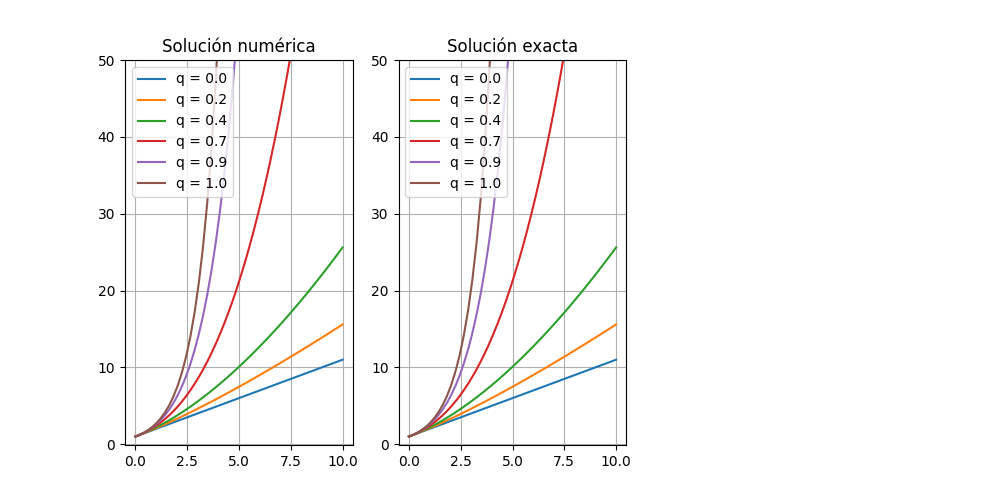

In [4]:
fig_sol = plt.figure(figsize=(10,5))
ax1 = fig_sol.add_subplot(131)
ax2 = fig_sol.add_subplot(132)

t = np.linspace(0,10)
ax1.set_ylim(-0.1,50)
ax2.set_ylim(-0.1,50)
ax1.grid()
ax2.grid()

for i,j in enumerate(q):
    y = GetEuler2(f,t,j)
    ax1.plot(t,y,label="q = %s"%(j))

    if not q[i] == 1:
        ax2.plot(t,ExactF(t,q[i]),label="q = %s"%(j))
    else:
        ax2.plot(t,np.exp(t),label="q = %s"%(j))

        
ax1.set_title("Solución numérica")
ax2.set_title("Solución exacta")

ax1.legend()
ax2.legend()

# Punto 6 ฅ^•ﻌ•^ฅ
---

Consideremos la expansión de Taylor de orden 2 sobre la ecuación de $\vec{r}(t)$ dada una variación de tiempo $\Delta t$. Es decir:
$$
\begin{align*}
    &\vec{r}(t+\Delta t)=\vec{r}(t) + \dot{\vec{r}}(t)\Delta t + \frac{1}{2}\ddot{\vec{r}}(t)\Delta^2t + \ldots,\\
    &\vec{r}(t+\Delta t)\approx\vec{r}(t) + \dot{\vec{r}}(t)\Delta t + \frac{1}{2}\ddot{\vec{r}}(t)\Delta^2t,\\
    &\vec{r}(t+\Delta t)\approx\vec{r}(t) + {\vec{v}}(t)\Delta t + \frac{1}{2}{\vec{a}}(t)\Delta^2t.\\
\end{align*}
$$
De modo similar, en el caso de la variación en la velocidad por el mismo factor $\Delta t$ podemos integrar usando la posición actual y nueva tq:
$$
\vec{v}(t+\Delta t)=v(t)+\int_{t}^{t+\Delta t}a(t)dt\approx\vec{v}(t) + \frac{\Delta t}{2}{(\vec{a}(t+{\Delta t})+\vec{a}(t))}.
$$

Por otro lado, se conoce que la excentricidad de una elipse está dada por $e=\frac{l}{a}$. Por lo tanto, dado que para un planeta del sistema solar el sol se encuentra en un foco de la elipse. El afelio se definirá como la posición del planeta más alejada del sol. Luego, por definición de la elipse, los vértices, los focos y el centro de la elipse son colineares, en nuestro caso, el afelio, sol y centro de la órbita. Luego,
$$
r=l+a=(ae)+a=a(e+1)
$$
Por último, tomando al sol en el origen y al afelio en el eje horizontal, tenemos que
$$
\vec{r}(0)=[a(e+1),0].
$$
Por último, reemplazando directamente este valor en $\vec{v}$, se obtiene que:
$$
\vec{v}(0)=\left[0,\sqrt{\frac{G(1-e)}{a(1+e)}}\right].
$$


## Cálculo   (=ↀωↀ=) 
---
### Def. Variables:

In [30]:
alpha,e,a = 1.1e-8, 0.205630,0.387098
G = 6.67430e-11
ht = 1e-8

In [36]:
r_0 = a*(1+e)
v_0 = np.sqrt(G*(1-e)/(r_0))

r0 = np.array([r_0, 0])
v0 = np.array([0, v_0])

t = np.arange(0,3.1,ht)

### Funciones:

In [70]:
def Aceleration(r):
    d = np.linalg.norm(r)
    return -(G/d**3)*(1 + alpha/(d**2))*r

def Verlet(x0, v0,t):
    x_p = x0
    v_p = v0
    
    perihelio = np.array([])
    for i in tqdm(range(len(t)), desc='Running Verlet stuff', unit=' Steps' ):
        a_p = Aceleration(x_p)
        x_p = x_p + v_p*ht + 0.5*a_p*(ht**2)
        a_f = Aceleration(x_p)
        v_p = v_p + (a_f + a_p)*(ht/2)
        
        angle = np.arctan(x_p[1]/ x_p[0])*(180/np.pi)

        try:
            perihelio = np.append(perihelio, angle-perihelio[0])

        except IndexError:
            perihelio = np.append(perihelio, angle)
            
    return perihelio

### Gráfica
---
Esperemos que cargue... ᓚ₍ ^. .^₎

Se manejaron saltos temporales de $1e-5$ dado que cuando se usaba $1e-8$ el código necesitaba calcular una cantidad de datos tan grande que para lograr el 1% de esto se demoraba más de 8 horas. Se buscó, también, usar saltos de $8e-8$; no obstante, para cargar el 3% se demoraba 40 minutos.

In [52]:
v0 = np.array(np.array([0, np.sqrt(G*(1 - e)/(a*(1 + e)))]))
x0 = np.array([a*(1 + e), 0])

In [75]:
t2 = np.arange(0,3.1,ht*1e3)
perihelio = Verlet(x0, v0,t2)

Running Verlet stuff: 100%|██████████| 310000/310000 [02:23<00:00, 2167.52 Steps/s] 


1.308532311185856e-06

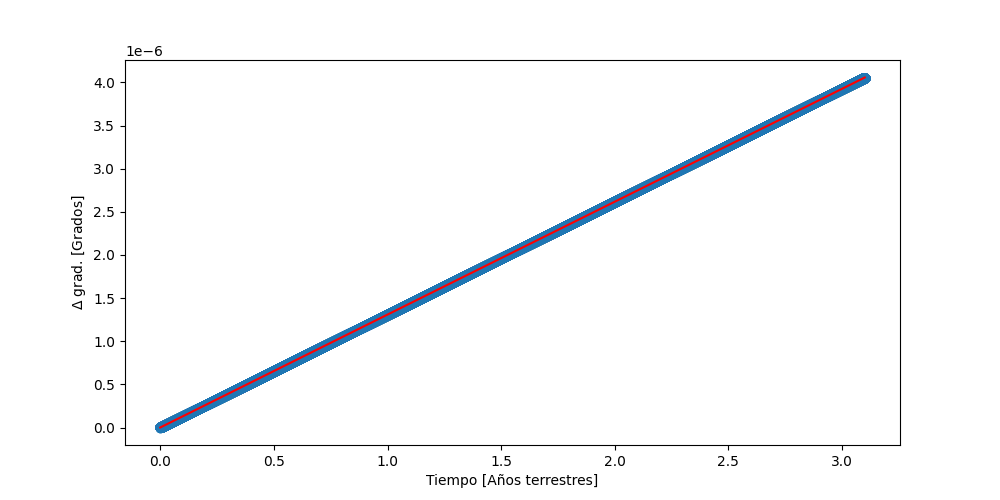

In [79]:
figP = plt.figure(figsize = (10, 5))
perihelio = perihelio - perihelio[0]
plt.scatter(t2, perihelio)
plt.plot(t2, perihelio, color='red')
m, b = np.polyfit(t2, perihelio, 1)
plt.ylabel("$\Delta$ grad. [Grados]")
plt.xlabel("Tiempo [Años terrestres]")
m

#### Aquí es visible cuanto se demoraba el código cargando todos los saltos originales:

In [53]:
perihelio, period = Verlet(x0, v0,t)

figP = plt.figure(figsize = (10, 5))
perihelio = perihelio - perihelio[0]
plt.scatter(period, perihelio)
plt.ylabel("$\Delta$ grad. [Grados]")
plt.xlabel("Tiempo [Años terrestres]")

Running Verlet stuff:   1%|          | 1575307/310000000 [8:24:24<1645:55:04, 52.05 Steps/s]     


KeyboardInterrupt: 